In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kmeans import KMeans

In [2]:
def read_present_data(synthetic_data = False):

    df_customers = pd.read_csv('../datasets/Mall_Customers.csv') 
    df_customers.drop(['CustomerID', 'Gender'], axis=1, inplace=True)
    
    # Additional synthetic columns
    df_customers['Number of Purchases'] = np.random.randint(1, 20, size=len(df_customers))
    df_customers['Average Purchase Amount'] = np.round(np.random.uniform(10, 1000, size=len(df_customers)), 2)
    
    if synthetic_data:
        synthetic_data_size = 800
        # Additional synthetic rows
        new_rows = {
            'Age': np.random.randint(df_customers['Age'].min(), df_customers['Age'].max(), size=synthetic_data_size),
            'Annual Income (k$)': np.random.randint(df_customers['Annual Income (k$)'].min(), df_customers['Annual Income (k$)'].max(), size=synthetic_data_size),
            'Spending Score (1-100)': np.random.randint(df_customers['Spending Score (1-100)'].min(), df_customers['Spending Score (1-100)'].max(), size=synthetic_data_size),
            'Number of Purchases': np.random.randint(df_customers['Number of Purchases'].min(), df_customers['Number of Purchases'].max(), size=synthetic_data_size),
            'Average Purchase Amount': np.random.uniform(df_customers['Average Purchase Amount'].min(), df_customers['Average Purchase Amount'].max(), size=synthetic_data_size),
        }
        # Concatenate the new data to the existing DataFrame
        df_customers = pd.concat([df_customers, pd.DataFrame(new_rows)], ignore_index=True)

    return df_customers


In [3]:
df_customers = read_present_data()
df_customers

,Age,Annual Income (k$),Spending Score (1-100),Number of Purchases,Average Purchase Amount
0,19,15,39,10,675.21
1,21,15,81,5,934.51
2,20,16,6,16,563.31
3,23,16,77,1,675.72
4,31,17,40,18,86.28
...,...,...,...,...,...
195,35,120,79,7,134.99
196,45,126,28,10,161.66
197,32,126,74,9,350.37
198,32,137,18,17,18.38


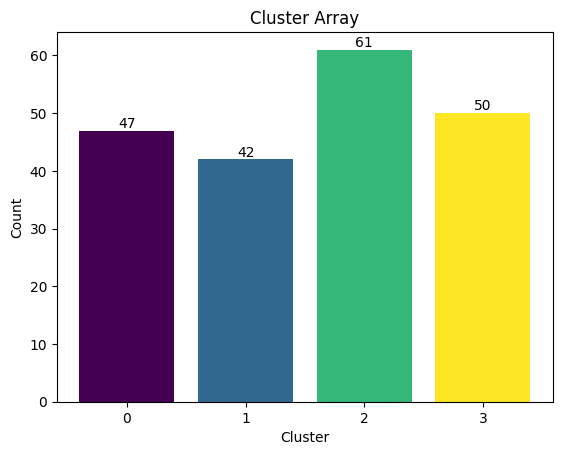

Cluster Array
 [3 1 3 3 0 2 2 0 1 0 3 3 0 2 3 1 1 0 0 0 0 1 1 3 2 2 3 0 1 1 2 2 1 1 0 1 3
 1 2 0 1 3 2 2 0 1 2 2 3 2 2 0 2 2 1 0 2 2 3 2 2 2 2 3 2 2 0 1 2 2 3 3 3 0
 1 2 2 2 0 0 0 2 0 2 3 3 1 0 2 1 2 1 2 0 3 2 0 0 2 3 2 2 1 1 2 1 1 1 0 2 0
 2 2 1 3 0 3 1 0 2 3 2 2 2 1 0 3 3 0 2 2 2 1 0 3 0 2 0 3 3 0 3 0 1 1 1 1 3
 0 0 3 1 3 2 3 2 2 3 3 1 2 3 3 2 2 3 3 1 3 0 1 0 3 0 2 3 2 0 3 1 3 3 2 2 1
 3 1 3 3 1 3 3 0 1 0 0 0 2 0 0] 

Cluster Centroids
 [[-0.41390181 -0.30237297 -0.35729771 -0.54676831  0.0090276 ]
 [-0.41653138 -0.32555228 -0.34323959 -0.5443222   3.40059239]
 [-0.40336739 -0.33045073 -0.36500622 -0.54326386  1.1001064 ]
 [-0.42812099 -0.2951478  -0.37890605 -0.54530826  2.33573988]]


In [4]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'random', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers, scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=False, plot_data=False)

print("Cluster Array\n", kmeans.get_cluster_array(visualize=True), "\n")
print("Cluster Centroids\n", kmeans.get_centroids())

In [5]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'kmeans++', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers, scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=False, plot_data=False)

print("Cluster Array\n", kmeans.get_cluster_array(), "\n")
print("Cluster Centroids\n", kmeans.get_centroids())

Cluster Array
 [3 1 3 3 2 0 0 2 1 2 3 3 0 0 3 1 1 2 2 2 2 1 1 3 0 0 3 2 1 1 0 0 1 1 2 1 3
 1 0 2 1 3 0 0 2 1 0 0 3 0 0 2 0 0 1 2 0 0 3 0 0 0 0 3 0 0 2 1 0 0 3 3 3 2
 1 0 0 0 2 2 2 0 2 0 3 3 1 2 0 1 0 1 0 2 3 0 2 0 0 3 0 0 1 1 0 1 1 1 2 0 2
 0 0 1 3 2 3 1 2 0 3 0 0 0 1 2 3 3 2 0 0 0 1 0 3 2 0 2 3 3 2 3 2 1 1 1 1 3
 2 2 3 1 3 0 3 0 0 3 3 1 0 3 3 0 0 3 3 1 3 2 1 2 3 2 0 3 0 2 3 1 3 3 0 0 1
 3 1 3 3 1 3 3 2 1 2 2 2 0 2 2] 

Cluster Centroids
 [[-0.40394299 -0.33183266 -0.3659291  -0.54301292  1.0738988 ]
 [-0.41653138 -0.32555228 -0.34323959 -0.5443222   3.40059239]
 [-0.41378282 -0.29844849 -0.35542977 -0.54737225 -0.02724399]
 [-0.42812099 -0.2951478  -0.37890605 -0.54530826  2.33573988]]


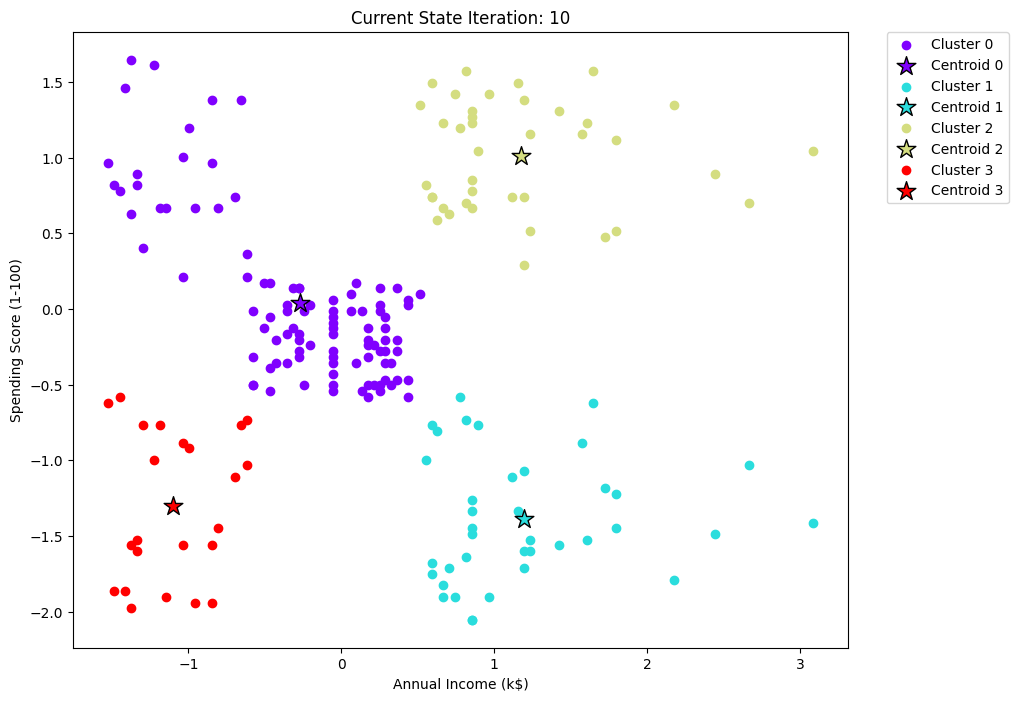

In [6]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'kmeans++', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers[['Annual Income (k$)', 'Spending Score (1-100)']], scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=True, plot_data=True)

In [7]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'kmeans++', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers[['Annual Income (k$)', 'Spending Score (1-100)', 'Average Purchase Amount']], scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=True, plot_data=True)